# Computing Notebooks
 **What**: Browser-based tool for interactive computing that allows the user to capture the whole computation process - developing, documenting, and executing code, as well as communicating the results.

#### Syntax and Features
1. There are two primary cell types -- Code and Markdown.
2. Enter your command in the input cell, then press __shift + enter__ to execute the command.
3. Magic commands
    - Line magics
    - Cell magics

In [2]:
print("hello world")

hello world


# Header
## H2
#### H3

## Headers and Formatting

> add

**bold**

_italic_

~~strikethrough~~




> block quote

`code`



Use LaTeX for formulas

\begin{equation}
 \Pr(A | B)=\frac{\Pr(B|A)\Pr(A)}{\Pr(B)}
\end{equation}

In [3]:
# Import external media with an iframe
from IPython.display import IFrame
IFrame('https://www.ou.edu/coe/dsai', width=950, height=650)

# Python Notes
Python is one of the more popular languages both generally and for data analysis purposes. With support from libraries like pandas, NumPy, Matplotlib, and others, it is a strong alternative to R, Matlab, SAS, and other widely used tools. 

This notebook is not intended to provide an exhaustive introduction to programming in Python. Rather, it is meant to give a brief overview of language features often used in data analysis tasks.
***

### Comments
are human readable text that the Python interpreter will not read. To create a comment, lead off the line with the `#` sign. 

Comments that span multiple lines are surrounded with triple quotes.

### Lists
- Ordered collection of _elements_ (values or variables), each identified by an index.
- Can be written as comma-separated values between square brackets `[...]`
- Mutable
- Usually the items in a list are of the same type
- Use square brackets `[]` to access elements

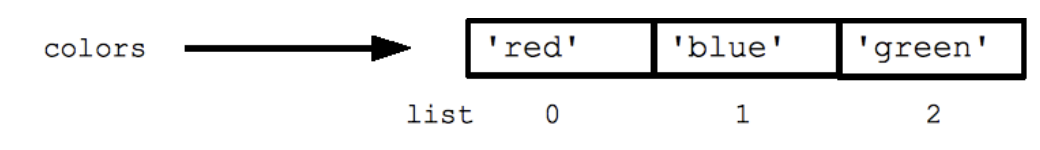

Use **slice** syntax to access part of a list -> `list[start:end:step]`

Negative indexing: from the end of the list.

Count the number of elements in the list.

### Dictionaries
- Unordered collections of objects
- Composed of keys and values
- Created with curly brackets `{...}`

Look up values by key with `[...]` syntax or `.get()` method.

### Function and object method calls
Functions are called using parenthesis and passing zero or more arguments. Optionally, you can assign the returned value to a variable. 

`result = f(x, y, z)`

`g()`

Functions can take _positional_ and _keyword_ arguments.

`f(a, b, c, d=5, e='foo')`

Many Python objects have attached functions, or _methods_ to access internal contents. Call them with _dot syntax_.

`obj.myMethod(x, y)`

## Modules

A **module** is a _.py_ file containing a set of functions that can be imported and included in your application. There are several ways to use modules:
* Import the entire module: _`import module`_
* Import only specific functions with **`from`**: _**`from`** `module import function1, function2, ...`_
* Rename a module by using the **`as`** keyword: _`import module` **`as`** `alias`_

Import the module called `statistics`.

Use the help function to see what `statistics` includes.

Find the mean of the following list: [-1.0, 2.5, 3.25, 5.75].

Import specific functions from a module as:

`from <module> import <function>`

Import the ceil function from the math module, and use the ceil function to find the smallest integer >= 2.1.

Rename a module with an alias:

`import <module> as <alias>`

# AMI and Wholesale Price Data

#### Load required libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load the data
Since the data is stored in csv format, we can use the `pandas.read_csv` function to load the data as a `pandas` DataFrame object. The `head()` function prints the first five rows of the DataFrame.

In [5]:
df1 = pd.read_csv('https://raw.githubusercontent.com/blcrow/ua101/main/srpMeterData1.txt')
df2 = pd.read_csv('https://raw.githubusercontent.com/blcrow/ua101/main/srpMeterData2.txt', header=None)
df_price = pd.read_csv('https://raw.githubusercontent.com/blcrow/ua101/main/price.csv')

Get an overview of the DataFrames with the `shape` attribute and the `head()` function.

#### Useful operations: indexing and slicing

View a single attribute (column) with bracket notation (`[]`) or with dot notation (`.`).

If using dot notation, beware of non-standard column names and attributes/methods.

And return data at multiple indexes by slicing (`[start:end:step]`).

See a subset of rows using the slice operator (`:`).

Using `loc` and `iloc`.

#### Filtering
Suppose we only want data that was captured _after_ Nov-2018.

We can create a Boolean filter by using a Boolean array as the index to the DataFrame.

View the feature type with the `dtype` attribute.

See general information about the DataFrame with `info()`.



Clean up issues with headers and columns. 

#### Merge these DataFrames to facilitate EDA. 

We will merge these DataFrames on Date/Time. Before we can do that, we need to work to reformat the date/time columns in `df_price`. First, recall the EDA process generally...



### Exploratory Data Analysis
**Purpose**: EDA is an important part of any data analysis in that it allows further data understanding.
 - Do the data meet your expectations?
 - Data cleaning
 
**Process**: 
1. Generate questions about the data
2. Search for answers by visualizing and transforming the data
3. Through your findings, continue to refine your questions and generate new ones

**Look for**:
 - Variation within variables
 - Covariation between variables
 
#### Quesions
What kind of features do we have?
 - Scale, type, domain...

How is the data quality
 - Relevant, trustworthy?
 - Missing values, outliers, cardinality?
 
Use the `info()` function to see some basic information about the object.

Summary statistics summarize large amounts of data by describuing key characteristics such as the average, distribution, and potential correlation. They can provide an idea of the distribution and the spread of values. This may help with decisions like whether or not to scale the data later on in the data preparation phase. 

Create a data quality report using descriptive statistics, cardinality, and percent of each feature missing.
 - Use `DataFrame.describe()` to view several descriptive statistics.
 - View the data cardinality with `DataFrame.nunique()`.
 - Use `DataFrame.isna()` to see missing values by feature. 

Cast categorical data as type `category` and use `describe()`.

Use `DataFrame.astype('<type>')`.

See the number of unique values in a column: `DataFrame.nunique()`

View the number of values coded as `NaN` by _chaining_ the `DataFrame.isna()` and `DataFrame.sum()` methods: `DataFrame.isna().sum()`.

Create a data quality report by transposing the DataFrame created with the `DataFrame.describe()` method, then adding new columns to that DataFrame with `DataFrame.nunique()` and `DataFrame.isna().sum()`.

**Question**: why are there 25 unique values in `HOUR_ENDING`?

View the unique values with `DataFrame.unique()`.

View a frequency table with `DataFrame.value_counts()`.

Change the value '0200D' to 200 to make our data consistent. The `DataFrame.replace()` method allows us to change specific values.

The meter data includes the timestamp starting at hour `0`. Let's adjust our price dataset so the timestamp is consistent with that of the meter data.

We can drop `HOUR_ENDING` now if desired.

**Question**: why does `INTERVAL_ENDING` have 100 values?

In [6]:
# df_price['INTERVAL_ENDING'].unique()

In [7]:
# df_price['INTERVAL_ENDING'].value_counts()


`INTERVAL_ENDING` has values that are similar to those in `HOUR_ENDING`...

In [8]:
# df_price['INTERVAL_ENDING'] = df_price['INTERVAL_ENDING'].replace({'0200D':'200', 
#                                   '0115D':'215',
#                                   '0130D':'230',
#                                   '0145D':'245'})

We only need the last two digits of `INTERVAL_ENDING`.
* Remove any surrounding whitespace with `str.strip()`.
* Retrieve the last two digits of `INTERVALE_ENDING`.

Cast `HOUR` to type `INT`.


Cast `OPERATION_DATE` to a `datetime` type with `pandas.to_datetime()`.

Now that we have the Date field in the desired format, let's set it as the index.
* The `pandas.timedelta` object represents the duration or difference between two dates and times. 
* Cast both `HOUR` and `INTERVAL` to `pandas.timedelta` objects.
* Concatenate `OPERATION_DATE`, `HOUR` and `INTERVAL`.

Set the `time` column as the index with `DataFrame.set_index()`.

Use the `pandas.merge()` function to join these datasets.

Let's continue with EDA by exploring individual columns.

Customize your plots with rcParams ([see docs](https://matplotlib.org/3.5.0/tutorials/introductory/customizing.html)).

In [9]:
# Make the default figure size larger.


Make a plot with `DataFrame.plot()`.

#### Distribution

Change the plot type by adjusting the `kind` parameter.

Use a boxplot.

Let's dig further into the most extreme values at the top and bottom of the distribution.

Let's view those whose delivered energy was less than 0.

It might be fun to plot the net amount for individual meters.

We can change the frequency of our time series with `DataFrame.resample()`. 

Calculate the mean by day.

View categorical variables with bar charts.

Let's look at `TOUTYPE`.

**Question**: What is the average price per type?

`DataFrame.groupby()` allows us to group and aggregate.

Correlation is an interesting metric to explore.

`DataFrame.corr()` return the correlation matrix (Pearson coefficient by default).

Another example (different dataset):

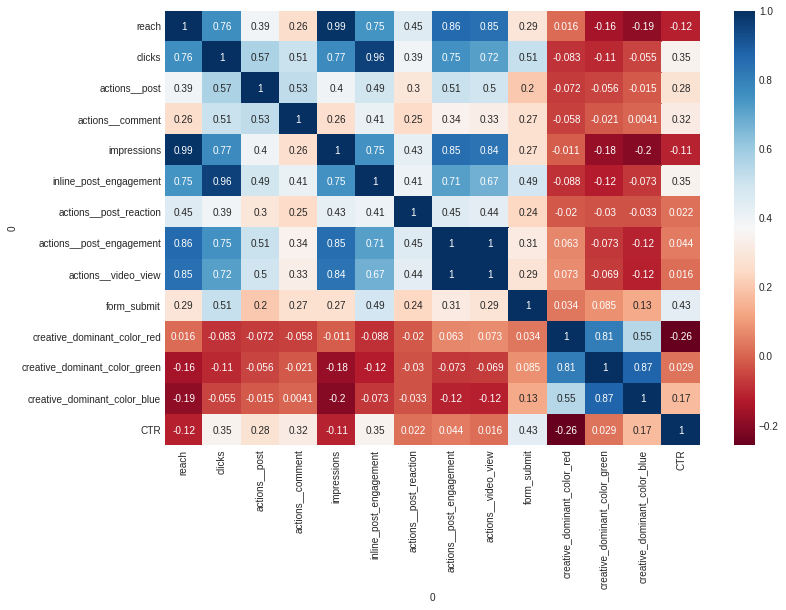

## Customize the graph

We might want to save this file locally.
* Import `files` from the `google.colab` module.
* Use the `files.download()` method to down load your file.